In [37]:
import yfinance as yfin

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf

from datetime import date, datetime

In [38]:
us_daily = pd.read_csv('./Wheat Futures US Daily (2000-24).csv',index_col=0)
us_weekly = pd.read_csv('./Wheat Futures US Weekly (2000-24).csv',index_col=0)
us_monthly = pd.read_csv('./Wheat Futures US Monthly (2000-24).csv',index_col=0)

In [39]:
us_daily

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-21 00:00:00-04:00,296.00,296.00,292.00,293.75,4842,0.0,0.0
2000-09-22 00:00:00-04:00,293.50,297.00,293.25,295.50,3945,0.0,0.0
2000-09-25 00:00:00-04:00,297.50,300.00,297.00,299.50,5073,0.0,0.0
2000-09-26 00:00:00-04:00,301.00,303.50,299.75,302.00,9180,0.0,0.0
2000-09-27 00:00:00-04:00,301.50,308.00,301.00,307.75,11145,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-12 00:00:00-04:00,552.75,558.75,540.00,548.25,54543,0.0,0.0
2024-08-13 00:00:00-04:00,551.50,552.00,541.00,547.75,35884,0.0,0.0
2024-08-14 00:00:00-04:00,547.00,552.00,542.00,546.25,27390,0.0,0.0


In [40]:
us_daily.drop(columns=['Dividends','Stock Splits'], inplace = True)
us_weekly.drop(columns=['Dividends','Stock Splits'], inplace = True)
us_monthly.drop(columns=['Dividends','Stock Splits'], inplace = True)

In [41]:
dly_chng = [0]*len(us_daily.Close.values)
weekly_chng = [0]*len(us_weekly.Close.values)
monthly_chng = [0]*len(us_monthly.Close.values)

for i in range(1, len(us_daily.Close.values)):
    dly_chng[i] = round((us_daily.Close.values[i] - us_daily.Close.values[i-1])/us_daily.Close.values[i-1] * 100, 2)

for i in range(1, len(us_weekly.Close.values)):
    weekly_chng[i] = round((us_weekly.Close.values[i] - us_weekly.Close.values[i-1])/us_weekly.Close.values[i-1] * 100, 2)

for i in range(1, len(us_monthly.Close.values)):
    monthly_chng[i] = round((us_monthly.Close.values[i] - us_monthly.Close.values[i-1])/us_monthly.Close.values[i-1] * 100, 2)

In [6]:
# dly_ret = [0]*len(us_daily.Close.values)
# weekly_ret = [0]*len(us_weekly.Close.values)
# monthly_ret = [0]*len(us_monthly.Close.values)

# for i in range(1, len(us_daily.Close.values)):
#     dly_ret[i] = round((us_daily.Close.values[i] - us_daily.Close.values[0])/us_daily.Close.values[0] * 100, 2)

# for i in range(1, len(us_weekly.Close.values)):
#     weekly_ret[i] = round((us_weekly.Close.values[i] - us_weekly.Close.values[0])/us_weekly.Close.values[0] * 100, 2)

# for i in range(1, len(us_monthly.Close.values)):
#     monthly_ret[i] = round((us_monthly.Close.values[i] - us_monthly.Close.values[0])/us_monthly.Close.values[0] * 100, 2)


In [50]:
dly_diff = [0]*len(us_daily.Close.values)
weekly_diff = [0]*len(us_weekly.Close.values)
monthly_diff = [0]*len(us_monthly.Close.values)

for i in range(1, len(us_daily.Close.values)):
    dly_diff[i] = round((us_daily.Close.values[i] - us_daily.Close.values[i-1]), 2)

for i in range(1, len(us_weekly.Close.values)):
    weekly_diff[i] = round((us_weekly.Close.values[i] - us_weekly.Close.values[i-1]), 2)

for i in range(1, len(us_monthly.Close.values)):
    monthly_diff[i] = round((us_monthly.Close.values[i] - us_monthly.Close.values[i-1]), 2)

In [52]:
us_daily['Daily Change (%)'] = dly_chng
us_weekly['Weekly Change (%)'] = weekly_chng
us_monthly['Monthly Change (%)'] = monthly_chng

us_daily['Daily Change'] = dly_diff
us_weekly['Weekly Change'] = weekly_diff
us_monthly['Monthly Change'] = monthly_diff

# us_daily['Returns (%)'] = dly_ret
# us_weekly['Returns (%)'] = weekly_ret
# us_monthly['Returns (%)'] = monthly_ret

In [53]:
us_daily.head()

,Open,High,Low,Close,Volume,Daily Change (%),Daily Change
Date,,,,,,,
2000-09-21 00:00:00-04:00,296.0,296.0,292.00,293.75,4842,0.00,0.00
2000-09-22 00:00:00-04:00,293.5,297.0,293.25,295.50,3945,0.60,1.75
2000-09-25 00:00:00-04:00,297.5,300.0,297.00,299.50,5073,1.35,4.00
2000-09-26 00:00:00-04:00,301.0,303.5,299.75,302.00,9180,0.83,2.50
2000-09-27 00:00:00-04:00,301.5,308.0,301.00,307.75,11145,1.90,5.75


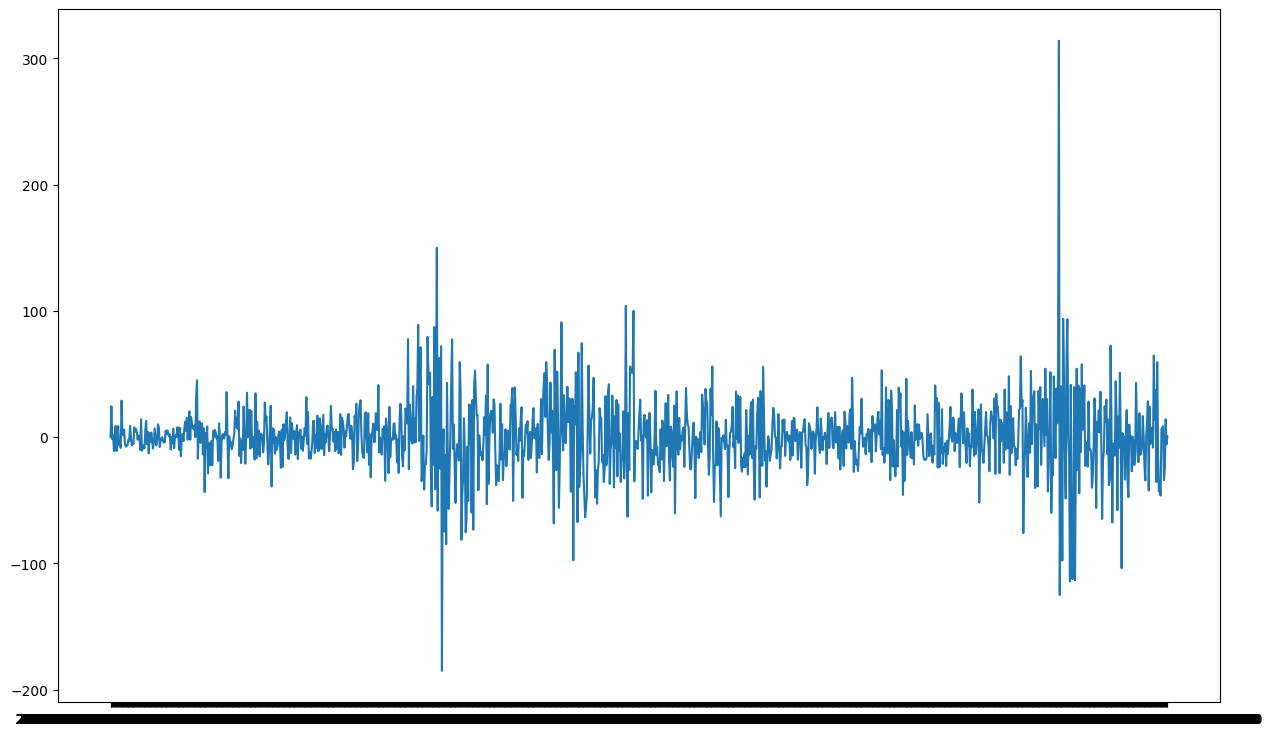

In [66]:
plt.figure(figsize=(15,9))
plt.plot(us_weekly['Weekly Change'])

C:\Users\yadav\AppData\Local\Temp\ipykernel_14572\3947141682.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(us_weekly['Weekly Change'].values))
C:\Users\yadav\AppData\Local\Temp\ipykernel_14572\3947141682.py:2: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(us_weekly['Weekly Change'].values))


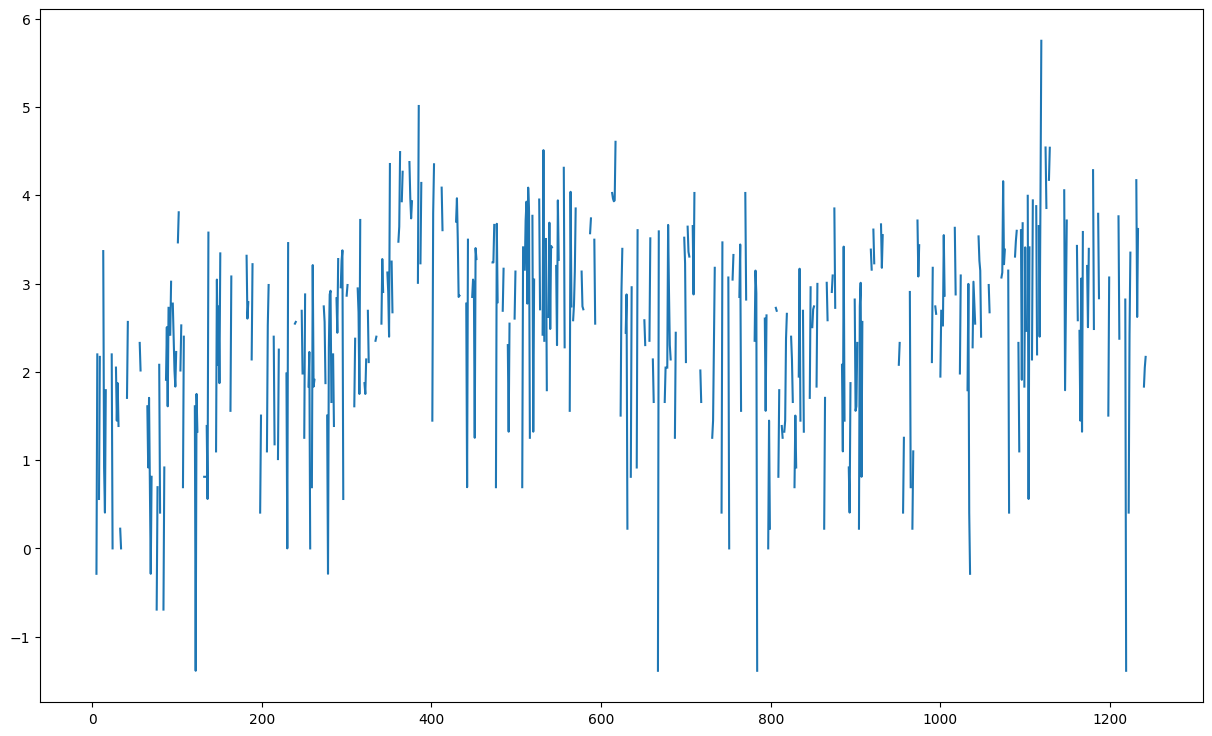

In [65]:
plt.figure(figsize=(15,9))
plt.plot(np.log(us_weekly['Weekly Change'].values))

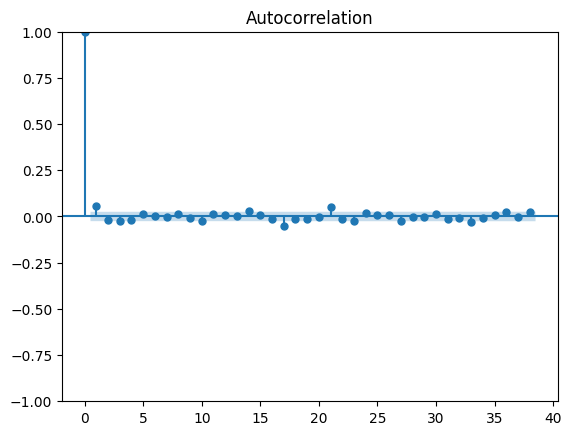

In [57]:
plot_acf(us_daily[['Daily Change']])
plt.show()

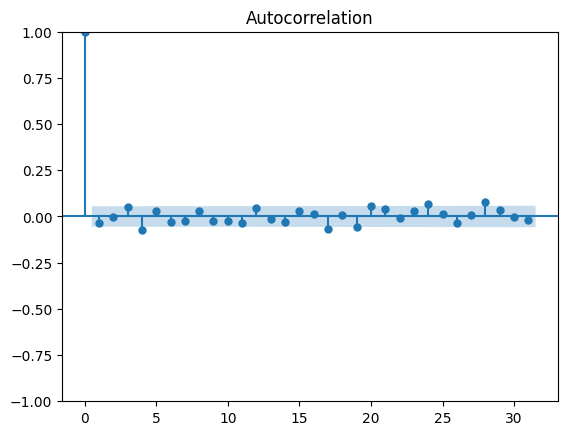

In [61]:
plot_acf(us_weekly[['Weekly Change']])
plt.show()

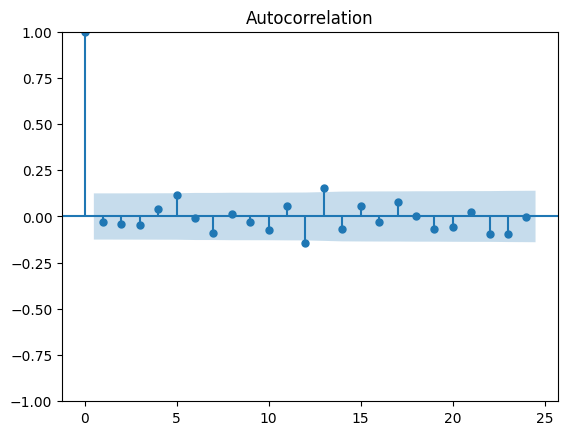

In [64]:
plot_acf(us_monthly[['Monthly Change (%)']])
plt.show()